# Part 3

In [1]:
"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."


'I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/penguins.csv")

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
# Converting categorical features

df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')
df['year'] = df['year'].astype('category') 
# I'm converting year also to categorical variable although it's ordinal. 
# It has only 3 values so I don't think the order would influence much.

In [10]:
# normalizing the df

df_normalized = df.copy()

for col in df_normalized.columns:
    if df_normalized[col].dtypes == float:
        df_normalized[col] = (df_normalized[col] - df_normalized[col].min()) / (df_normalized[col].max() - df_normalized[col].min())

In [11]:
df_normalized.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,0.432465,0.483912,0.490966,0.418627
std,0.198861,0.234433,0.237555,0.223671
min,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111
50%,0.450909,0.500000,0.423729,0.375000
75%,0.600000,0.666667,0.694915,0.576389
max,1.000000,1.000000,1.000000,1.000000


In [12]:
# One-hot encoding the categorical variables
df_normalized = pd.get_dummies(df_normalized, drop_first=True)

df_normalized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,0.254545,0.666667,0.152542,0.291667,0,0,0,1,1,0,0
1,0.269091,0.511905,0.237288,0.305556,0,0,0,1,0,0,0
2,0.298182,0.583333,0.389831,0.152778,0,0,0,1,0,0,0
4,0.167273,0.738095,0.355932,0.208333,0,0,0,1,0,0,0
5,0.261818,0.892857,0.305085,0.263889,0,0,0,1,1,0,0


In [13]:
# Creating Y and X dataframes
Y = df[['body_mass_g']] # taking the non-normalised column for Y 
# since taking normalised values for the response variable doesn't make sense here
X = df_normalized.drop(['body_mass_g'], axis=1)

In [14]:
# Split the data into train and test
np.random.seed(8)

train_size = int(0.8 * Y.shape[0])
indis = list(range(Y.shape[0]))
np.random.shuffle(indis)

train_indis = indis[:train_size]
test_indis = indis[train_size:]

y_train, y_test = Y.iloc[train_indis], Y.iloc[test_indis]
X_train, X_test = X.iloc[train_indis], X.iloc[test_indis]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(266, 10) (67, 10) (266, 1) (67, 1)


In [15]:
# For using the OLS formula, we need to add a column of 1's in the beginning of X data
# I'm defining a function to do that

def transform_X(x_array):
    return np.insert(x_array, 0, 1, axis=1)

In [16]:
X_train = transform_X(X_train)
X_train.shape

(266, 11)

In [17]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)
print(w.shape)
print("w = ", w.T)

(11, 1)
w =  [[2877.51855577  530.50047348  461.03453599 1085.2856634  -281.44585704
   853.19621352  -62.5048837   -88.80597828  370.20752529  -64.40199781
   -83.94097949]]


In [18]:
y_hat_train = np.dot(X_train, w)
MSE_train = 1/y_train.shape[0] * np.sum((y_train - y_hat_train) ** 2)
MSE_train

79764.55126323478

In [19]:
X_test = transform_X(X_test) # Transforming X_test array

y_hat_test = np.dot(X_test, w)
MSE_test = 1/y_test.shape[0] * np.sum((y_test - y_hat_test)**2)
MSE_test

80538.38653481143

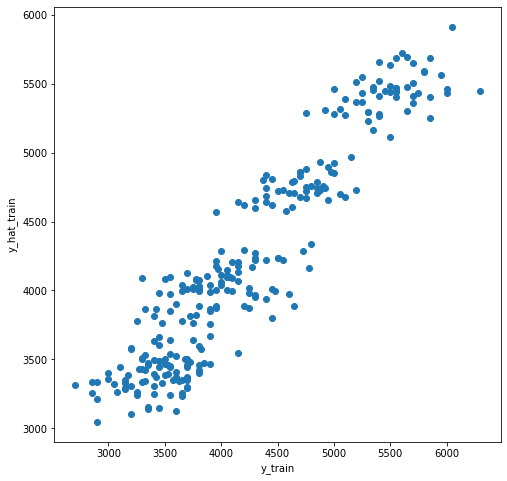

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_train, y=y_hat_train)
plt.xlabel("y_train")
plt.ylabel("y_hat_train")
plt.show()

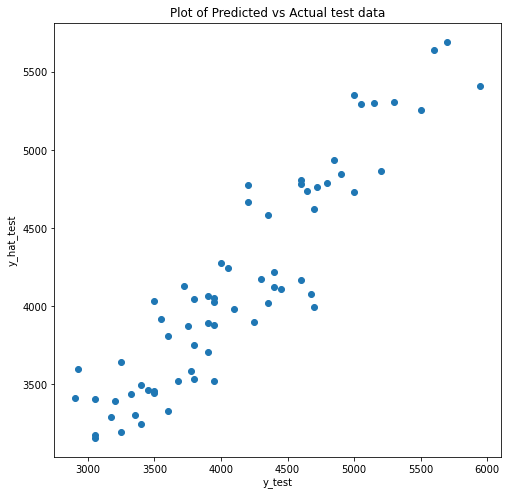

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test, y=y_hat_test)
plt.title("Plot of Predicted vs Actual test data")
plt.xlabel("y_test")
plt.ylabel("y_hat_test")
plt.show()

# Part 4

In [22]:
# Function for calculating weights for given X, y and lambda

def my_ridge(X, y, lambofgod):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambofgod*np.identity(X.shape[1])),X.T), y)

In [23]:
lambda_vals = [0.001, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 5, 10]
MSE_train_vals = []
MSE_test_vals = []

for lamb in lambda_vals:
    w = my_ridge(X_train, y_train, lamb)
    y_hat_train = np.dot(X_train, w)
    MSE_train = 1/y_train.shape[0] * np.sum((y_train - y_hat_train) ** 2)
    MSE_train_vals.append(MSE_train)
    
    y_hat_test = np.dot(X_test, w)
    MSE_test = 1/y_test.shape[0] * np.sum((y_test - y_hat_test) ** 2)
    MSE_test_vals.append(MSE_test)
    
print("Training MSEs ", list(zip(lambda_vals, MSE_train_vals)), "\n", "Test MSEs ", list(zip(lambda_vals, MSE_test_vals)))

Training MSEs  [(0.001, 79764.55379357025), (0.01, 79764.80148068338), (0.025, 79766.0866661304), (0.05, 79770.51237335798), (0.1, 79787.07617442854), (0.2, 79845.7401178943), (0.3, 79930.98862433304), (0.4, 80036.63485495198), (0.5, 80158.53058691986), (1, 80935.15385858358), (2, 82997.04234724162), (3, 85502.66061409647), (5, 91410.01744809185), (10, 109123.2513982573)] 
 Test MSEs  [(0.001, 80533.5914501749), (0.01, 80490.85622083425), (0.025, 80421.27119822675), (0.05, 80309.63811609596), (0.1, 80101.3323455333), (0.2, 79736.16378469215), (0.3, 79427.44792976043), (0.4, 79164.70694739715), (0.5, 78940.53768523263), (1, 78247.3080379396), (2, 78221.48638058703), (3, 79311.32838790832), (5, 83446.7462285439), (10, 99208.12753965531)]


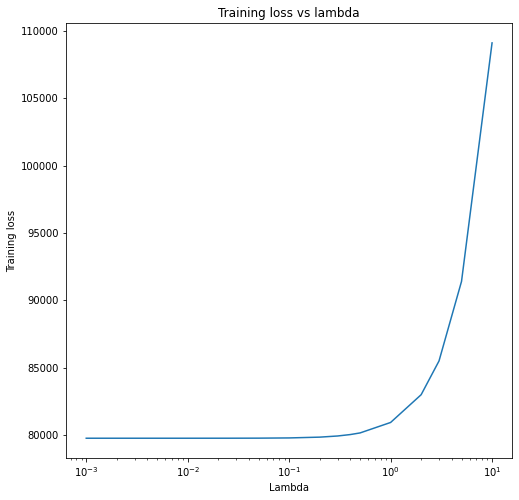

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.plot(lambda_vals, MSE_train_vals)
ax.set_xscale('log')
plt.title("Training loss vs lambda")
plt.xlabel("Lambda")
plt.ylabel("Training loss")
plt.show()

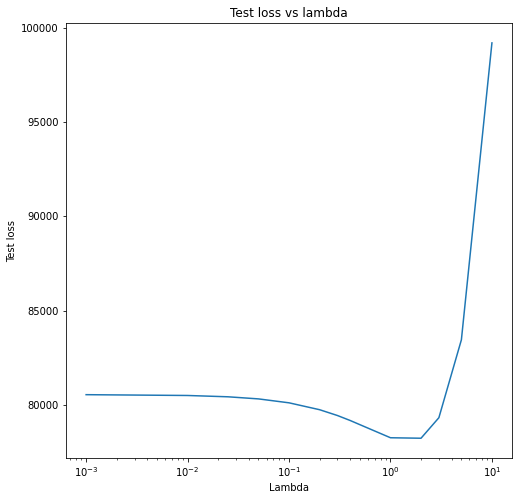

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plt.plot(lambda_vals, MSE_test_vals)
ax.set_xscale('log')
plt.title("Test loss vs lambda")
plt.xlabel("Lambda")
plt.ylabel("Test loss")
plt.show()

In [26]:
# Minimum test error was observed at lambda = 2

# Optimum w vector would be
w = my_ridge(X_train, y_train, 2)
print("w = ", w.T)

w =  [[ 2.56625140e+03  6.29132687e+02  7.26421028e+02  9.75710796e+02
  -2.84614760e+02  1.06196415e+03  3.63559480e+01  1.32509713e+01
   3.45337547e+02  2.35987248e+01 -1.13421376e+00]]


In [27]:
y_hat_test_ridge = np.dot(X_test, w)
MSE_test = 1/y_test.shape[0] * np.sum((y_test - y_hat_test_ridge) ** 2)
MSE_test

78221.48638058703

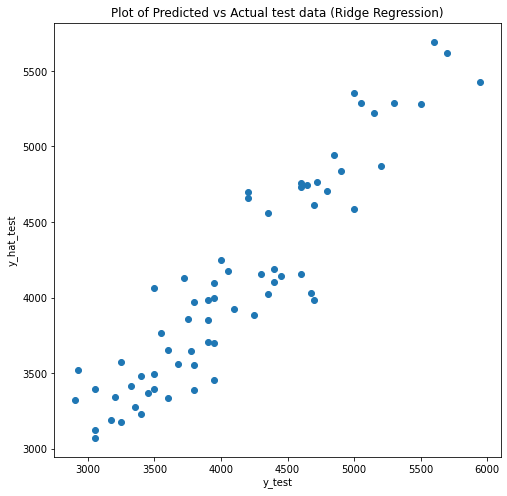

In [28]:
# Graph of y_hat_test vs y_hat_pred

plt.figure(figsize=(8,8))
plt.scatter(x=y_test, y=y_hat_test_ridge)
plt.title("Plot of Predicted vs Actual test data (Ridge Regression)")
plt.xlabel("y_test")
plt.ylabel("y_hat_test")
plt.show()

# Bonus

In [29]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(266, 11) (266, 1) (67, 11) (67, 1)


In [30]:
class RidgeRegression():
    def __init__(self, learning_rate, iterations, lamb):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lamb = lamb
    
    def fit(self, X_train, y_train):
        self.X = X_train
        self.Y = y_train
        np.random.seed(8)
        self.w = np.random.uniform(0, 1, self.X.shape[1])
        self.w = self.w.reshape([self.X.shape[1], 1])
        self.loss = []
        for i in range(self.iterations):
            self.loss.append(self.cost())
            self.gradient_descent()
        return self.loss, self.w
        
    def cost(self):
        self.J = 1/2*np.sum((self.Y-np.dot(self.X, self.w))**2) + 1/2*self.lamb*np.dot(self.w.T, self.w)
        return self.J.item()
        
    def gradient_descent(self):
        pred = np.dot(self.X, self.w)
        delta = pred - self.Y
        dw = 1/self.X.shape[0]*(np.dot(self.X.T, delta) + self.lamb*self.w)
        self.w = self.w - self.learning_rate * dw
        
    def predict(self, X):              
        return np.dot(X, self.w)

In [31]:
model1 = RidgeRegression(learning_rate=10**-5, iterations=10000, lamb=0.001 )
loss1, w1 = model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
MSE_test1 = 1/y_test.shape[0] * np.sum((y_test - y_pred1) ** 2)
MSE_test1

10713812.551658265

In [32]:
model2 = RidgeRegression(learning_rate=10**-3, iterations=10000, lamb=0.001 )
loss2, w2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
MSE_test2 = 1/y_test.shape[0] * np.sum((y_test - y_pred2) ** 2)
MSE_test2

112355.53395485133

In [33]:
model3 = RidgeRegression(learning_rate=10**-1, iterations=10000, lamb=0.001 )
loss3, w3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
MSE_test3 = 1/y_test.shape[0] * np.sum((y_test - y_pred3) ** 2)
MSE_test3

80515.51993017833

In [34]:
model4 = RidgeRegression(learning_rate=10**0, iterations=10000, lamb=0.001 )
loss4, w4 = model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
MSE_test4 = 1/y_test.shape[0] * np.sum((y_test - y_pred4) ** 2)
MSE_test4

/usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-30-433b760d613d>:20: RuntimeWarning: overflow encountered in square
  self.J = 1/2*np.sum((self.Y-np.dot(self.X, self.w))**2) + 1/2*self.lamb*np.dot(self.w.T, self.w)
<ipython-input-30-433b760d613d>:27: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.learning_rate * dw


nan

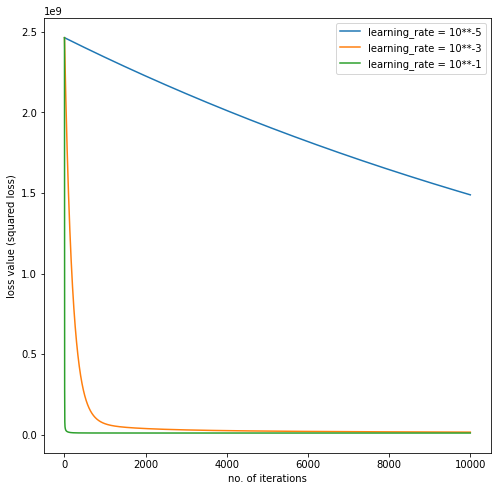

In [35]:
plt.figure(figsize=(8,8))
plt.plot(loss1, label="learning_rate = 10**-5")
plt.plot(loss2, label="learning_rate = 10**-3")
plt.plot(loss3, label="learning_rate = 10**-1")
plt.xlabel("no. of iterations")
plt.ylabel("loss value (squared loss)")
plt.legend()
plt.show()

In [36]:
model3_1 = RidgeRegression(learning_rate=10**-1, iterations=10000, lamb=0.01 )
loss3_1, w3_1 = model3_1.fit(X_train, y_train)
y_pred3_1 = model3_1.predict(X_test)
MSE_test3_1 = 1/y_test.shape[0] * np.sum((y_test - y_pred3_1) ** 2)
MSE_test3_1

80474.06185680896

In [37]:
model3_2 = RidgeRegression(learning_rate=10**-1, iterations=10000, lamb=2)
loss3_2, w3_2 = model3_2.fit(X_train, y_train)
y_pred3_2 = model3_2.predict(X_test)
MSE_test3_2 = 1/y_test.shape[0] * np.sum((y_test - y_pred3_2) ** 2)
MSE_test3_2

78221.49029104869

In [38]:
model3_3 = RidgeRegression(learning_rate=10**-1, iterations=10000, lamb=10 )
loss3_3, w3_3 = model3_3.fit(X_train, y_train)
y_pred3_3 = model3_3.predict(X_test)
MSE_test3_3 = 1/y_test.shape[0] * np.sum((y_test - y_pred3_3) ** 2)
MSE_test3_3

99208.12753965711

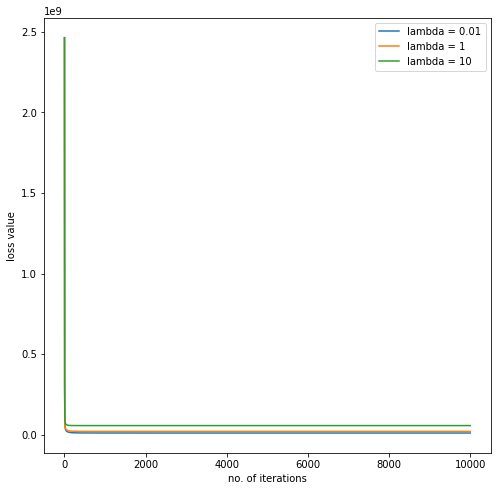

In [39]:
plt.figure(figsize=(8,8))
plt.plot(loss3_1, label="lambda = 0.01")
plt.plot(loss3_2, label="lambda = 1")
plt.plot(loss3_3, label="lambda = 10")
plt.xlabel("no. of iterations")
plt.ylabel("loss value")
plt.legend()
plt.show()

In [40]:
# checking time to train

import time

In [41]:
start_time = time.time()
_ = my_ridge(X_train, y_train, 1)
print(time.time() - start_time, "seconds")

0.0006990432739257812 seconds


In [42]:
start_time = time.time()
model = RidgeRegression(learning_rate=10**-1, iterations=10000, lamb=1 )
_, _ = model.fit(X_train, y_train)
print(time.time() - start_time, "seconds")

0.3811061382293701 seconds


# References

1. https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution